<font color='red' size='6'>REMINDER</font>

# Fill in any place that says `YOUR CODE HERE`.
- You should remove the line that says `raise NotImplementedError()`. If you do not, your code will (unsurprisingly) throw a run-time error and cause everything to fail.
- Do **NOT** write your answer anywhere else other than where it says `YOUR CODE HERE`. Simply write your code directly below this comment in the **same code cell**.

# Make sure everything runs as expected.
- Go to the menubar, select *Kernel* > *Restart & Run All*

# Do <ins>NOT</ins> change the title (i.e., file name) of this notebook.

# Do <ins>NOT</ins> delete any of the cells in this notebook.

# Make sure you save your work
- Go to the menubar, select *File* > *Save and Checkpoint*

In [1]:
# Run this code cell
from nose.tools import assert_equal, assert_in, assert_is_instance
from nose.tools import assert_almost_equal, assert_not_equal, assert_not_in

# 1. Historical Requests

Pallet Movers has given you a representative sample of requests for freight hauling services from customers during the years 2020 through 2022. The data is in the file `requests_3yr.csv` in the folder `data`. There is an additional column in comparison to some of the other data files you have seen from Pallet Movers before: `request_pickup_date`. This is the date that the customer would like for their freight to be picked up at the origin location. Read the data into a `DataFrame` variable named `requests`, being sure that the column `request_pickup_date` comes in as a date object.

In [2]:
# YOUR CODE HERE
import pandas as pd

# read in the file requests_3yr.csv to requests var
requests = pd.read_csv('./data/requests_3yr.csv', parse_dates=['request_pickup_date'])

In [3]:
# view requests and confirm 'request_pickup_date' is a date object
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12128 entries, 0 to 12127
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   request_id                    12128 non-null  object        
 1   request_pickup_date           12128 non-null  datetime64[ns]
 2   origin_city                   12128 non-null  object        
 3   origin_state                  12128 non-null  object        
 4   origin_liftgate_service       12128 non-null  int64         
 5   destination_city              12128 non-null  object        
 6   destination_state             12128 non-null  object        
 7   destination_liftgate_service  12128 non-null  int64         
 8   handling_unit                 12128 non-null  object        
 9   length                        12128 non-null  int64         
 10  width                         12128 non-null  int64         
 11  height                      

In [4]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
import numpy as np
assert_equal(requests.request_pickup_date.dtype.type, np.datetime64, msg='Your column request_pickup_date is not a date')

<hr>

# 2. Change the Index

Set the index for your `DataFrame` named `requests` to the column `request_pickup_date`.

In [5]:
# YOUR CODE HERE
requests = requests.set_index('request_pickup_date')

In [6]:
# confirm index is 'request_pickup_date'
requests.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12128 entries, 2020-02-25 to 2022-08-02
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   request_id                    12128 non-null  object
 1   origin_city                   12128 non-null  object
 2   origin_state                  12128 non-null  object
 3   origin_liftgate_service       12128 non-null  int64 
 4   destination_city              12128 non-null  object
 5   destination_state             12128 non-null  object
 6   destination_liftgate_service  12128 non-null  int64 
 7   handling_unit                 12128 non-null  object
 8   length                        12128 non-null  int64 
 9   width                         12128 non-null  int64 
 10  height                        12128 non-null  int64 
 11  weight                        12128 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.2+ MB


<hr>

# 3. Plotting the Number of Requests

You want to create two different line plots for the number of requests. 

1. Create a line plot where the $x$-axis is the month of the requested pickup date and the $y$-axis is the number of requests for each month. Use circles for markers on your line plot. (Sanity Check: You should have 36 circles on your line plot, one for each month where you have data.)
2. Create a line plot where the $x$-axis is the quarter of the requested pickup date and the $y$-axis is the number of requests for each quarter. Use circles for markers on your line plot. (Sanity Check: You should have 12 circles on your line plot, one for each quarter across the three-year period.)

In [7]:
# 1. Monthly line plot
# YOUR CODE HERE
# import seaborn pacakge
import seaborn as sns

# Create monthly with only pickupd and requests
requests_month = requests.copy()

requests_month.drop(columns=['origin_city', 'origin_state', 'origin_liftgate_service', 'destination_city',
                                'destination_state', 'destination_liftgate_service', 'handling_unit', 'length', 'width',
                                'height', 'weight'], inplace=True)



In [8]:
# view month and requests only
requests_month
print(type(requests_month))

<class 'pandas.core.frame.DataFrame'>


In [9]:
# count by month
requests.groupby(requests.index.month)['request_id'].sum()

request_pickup_date
1     2020_01_00132020_01_00292020_01_00502020_01_00...
2     2020_01_00012020_01_00372020_01_00592020_01_00...
3     2020_01_00212020_01_00322020_01_00412020_01_00...
4     2020_01_00042020_01_00172020_01_00192020_01_00...
5     2020_01_00052020_01_00422020_01_00442020_01_00...
6     2020_01_00112020_01_00122020_01_00452020_01_00...
7     2020_01_00352020_01_00362020_01_00402020_01_00...
8     2020_01_00612020_01_00622020_01_00762020_01_00...
9     2020_01_00032020_01_00232020_01_00272020_01_00...
10    2020_01_00062020_01_00092020_01_00142020_01_00...
11    2020_01_00102020_01_00262020_01_00392020_01_00...
12    2020_01_00022020_01_00072020_01_00082020_01_00...
Name: request_id, dtype: object

In [10]:
mon_req = requests.resample("M").count()

In [11]:
mon_req

,request_id,origin_city,origin_state,origin_liftgate_service,destination_city,destination_state,destination_liftgate_service,handling_unit,length,width,height,weight
request_pickup_date,,,,,,,,,,,,
2020-01-31,248,248,248,248,248,248,248,248,248,248,248,248
2020-02-29,211,211,211,211,211,211,211,211,211,211,211,211
2020-03-31,276,276,276,276,276,276,276,276,276,276,276,276
2020-04-30,193,193,193,193,193,193,193,193,193,193,193,193
2020-05-31,187,187,187,187,187,187,187,187,187,187,187,187
2020-06-30,192,192,192,192,192,192,192,192,192,192,192,192
2020-07-31,307,307,307,307,307,307,307,307,307,307,307,307
2020-08-31,352,352,352,352,352,352,352,352,352,352,352,352
2020-09-30,340,340,340,340,340,340,340,340,340,340,340,340


In [12]:
print(type(mon_req))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='request_pickup_date'>

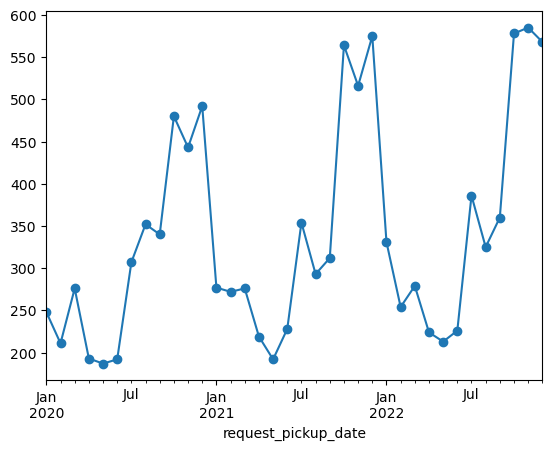

In [13]:
mon_req.request_id.plot(marker='o')

In [14]:
# 2. Quarterly line plot
# YOUR CODE HERE
qtr_req = requests.resample("Q").count()

In [15]:
# view qtr_req, should have 12 rows depicting quarters
qtr_req

,request_id,origin_city,origin_state,origin_liftgate_service,destination_city,destination_state,destination_liftgate_service,handling_unit,length,width,height,weight
request_pickup_date,,,,,,,,,,,,
2020-03-31,735,735,735,735,735,735,735,735,735,735,735,735
2020-06-30,572,572,572,572,572,572,572,572,572,572,572,572
2020-09-30,999,999,999,999,999,999,999,999,999,999,999,999
2020-12-31,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415
2021-03-31,825,825,825,825,825,825,825,825,825,825,825,825
2021-06-30,639,639,639,639,639,639,639,639,639,639,639,639
2021-09-30,959,959,959,959,959,959,959,959,959,959,959,959
2021-12-31,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655
2022-03-31,864,864,864,864,864,864,864,864,864,864,864,864


<AxesSubplot:xlabel='request_pickup_date'>

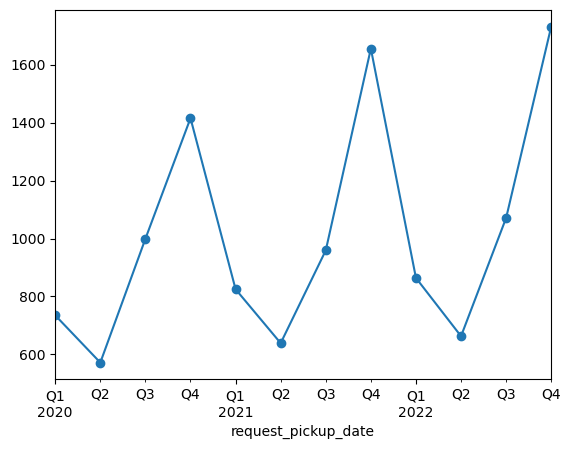

In [16]:
# plot
qtr_req.request_id.plot(marker='o')

## Carefully explain any patterns and their insights that you see in the two line plots in the markdown cell below. 

The insights from the monthly and quarterly data indicate a general positive trend with seasonality indicators. The general upward trend is evident as the peaks continue to rise farther beyond the previous year's data. The peaks appear to be in intervals of three months long or quarters of a year in the monthly data. Referencing the quarterly data, the peaks are evident in the fourth qurater or Q4 for each year, followed be a decrease. This decrease is evident in both the monthly and quarterly data, although the monthly data provides further insights into the decline and subsequent incline. Each of the troughs within the data on the monthly plot indicates a singular low point for each year that is following by an increase. The quarterly data further supports this as the requests show a singular bottom and relatively steep increase after each drop. The lowest points are within the monthly data appear to be in month May and 2nd quarter, indicating that the data is following standard calendar years for quarter information. Third quarter appears to be the improvement quarter, where the requests data reliably begins the steady increase to the fourth quarter highs.

# 4. Add Column

Add a column named `qtr` to the `requests` `DataFrame` to keep track of which quarter the requested pickup belongs to. If the request is in the first quarter (i.e., January, February, or March), the column `qtr` should contain the string "Q1". Similar coding should be done for the remaining quarters. 

In [17]:
# YOUR CODE HERE
# new col named 'qtr', add 'Q' string in front, refer to index, .quarter for quarters, make string to add 'Q' in front
requests['qtr'] = 'Q' + requests.index.quarter.astype(str)

In [18]:
#check
requests

,request_id,origin_city,origin_state,origin_liftgate_service,destination_city,destination_state,destination_liftgate_service,handling_unit,length,width,height,weight,qtr
request_pickup_date,,,,,,,,,,,,,
2020-02-25,2020_01_0001,Morgantown,WV,0,Birmingham,AL,0,box,36,36,24,362,Q1
2020-12-19,2020_01_0002,Birmingham,AL,0,White Plains,NY,0,pallet,48,40,60,3483,Q4
2020-09-12,2020_01_0003,Catskill,NY,0,White Plains,NY,0,pallet,48,40,54,4262,Q3
2020-04-24,2020_01_0004,Newport News,VA,0,White Plains,NY,0,pallet,48,40,42,3250,Q2
2020-05-19,2020_01_0005,Greensboro,NC,0,Catskill,NY,0,pallet,48,40,51,3834,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27,2022_01_4325,Lynchburg,VA,0,Harrisburg,PA,0,pallet,48,40,51,4268,Q4
2022-12-12,2022_01_4326,Fredericksburg,VA,0,Spartanburg,SC,0,crate,48,48,72,3491,Q4
2022-12-15,2022_01_4327,Philadelphia,PA,0,Allentown,PA,0,pallet,48,40,70,4083,Q4


In [19]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_equal(requests.loc['2022-03-15']['qtr'][0], 'Q1', msg='You did not code quarter 1 correctly')

<hr>

<hr>

<hr>

# 5. Preparing Data for Modeling

Your end goal is to create a model that can predict the number of customer requests for the next four quarters for Pallet Movers. First, however, you must wrangle the data into a format conducive to creating a predictive model. Complete the following tasks to get the data into a suitable format. The image below shows what the resulting `DataFrame` should look like (note, the numbers may be different than shown). In particular, you **must use the column names as shown**. They are `year`, `request_id`, `origin_liftgate_service`, `destination_liftgate_service`, `length`, `width`, `height`, `weight`, `qtr_Q1`, `qtr_Q2`, `qtr_Q3`, and `tpi`.

![Format of data for modeling](images/data_format.png)

1. Add a column named `year` to the `requests` `DataFrame`.
2. Create a `DataFrame` named `summary_data` that groups by the year and the quarter, counts the number of requests, finds the average for `origin_liftgate_service`, `destination_liftgate_service`, `length`, `width`, and `height`, and finds the total `weight`. 
3. You need to get the parts of the MultiIndex in `summary_data` into their own columns. Store your results in a `DataFrame` named `qtrly_data`. 
4. Create dummy variables for `qtrly_data`, dropping the one created for the value 'Q4' in the column `qtr`. (Thought Exercise: Is there a reason Q4 is the one I want you to drop?) Store your results in a variable named `coded_data`. (**NOTE: Make sure the data type for each of the three columns is `int` by passing the argument `dtype=int` when creating the dummies.**)
5. Add a column named `tpi` to `coded_data`. This column represents the **time period index** and should start at 1 for the oldest quarter and count up by 1 for each additional quarter.


In [20]:
# 1. Add year to requests
# YOUR CODE HERE
requests['year'] = requests.index.year

In [21]:
# check
requests

,request_id,origin_city,origin_state,origin_liftgate_service,destination_city,destination_state,destination_liftgate_service,handling_unit,length,width,height,weight,qtr,year
request_pickup_date,,,,,,,,,,,,,,
2020-02-25,2020_01_0001,Morgantown,WV,0,Birmingham,AL,0,box,36,36,24,362,Q1,2020
2020-12-19,2020_01_0002,Birmingham,AL,0,White Plains,NY,0,pallet,48,40,60,3483,Q4,2020
2020-09-12,2020_01_0003,Catskill,NY,0,White Plains,NY,0,pallet,48,40,54,4262,Q3,2020
2020-04-24,2020_01_0004,Newport News,VA,0,White Plains,NY,0,pallet,48,40,42,3250,Q2,2020
2020-05-19,2020_01_0005,Greensboro,NC,0,Catskill,NY,0,pallet,48,40,51,3834,Q2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27,2022_01_4325,Lynchburg,VA,0,Harrisburg,PA,0,pallet,48,40,51,4268,Q4,2022
2022-12-12,2022_01_4326,Fredericksburg,VA,0,Spartanburg,SC,0,crate,48,48,72,3491,Q4,2022
2022-12-15,2022_01_4327,Philadelphia,PA,0,Allentown,PA,0,pallet,48,40,70,4083,Q4,2022


In [22]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_equal(requests.loc['2022-11-15']['year'][0], 2022, msg='You did not code the year for 2022-11-15 correctly')

<hr>

In [23]:
# 2. Create summary data
# YOUR CODE HERE
# group by year, counts num requests, mean for origin_liftgate_service/destination_liftgate_service/length/width/height, sum weight
summary_data = requests.groupby(['year', 'qtr']).agg({'request_id': ['count'], 
                                       'origin_liftgate_service': ['mean'],
                                      'destination_liftgate_service': ['mean'], 
                                       'length': ['mean'], 
                                       'width': ['mean'],
                                      'height': ['mean'], 
                                       'weight': ['sum']})

In [24]:
# check
summary_data

request_id origin_liftgate_service destination_liftgate_service  \
              count                    mean                         mean   
year qtr                                                                   
2020 Q1         735                0.103401                     0.225850   
     Q2         572                0.103147                     0.227273   
     Q3         999                0.113113                     0.242242   
     Q4        1415                0.124382                     0.228269   
2021 Q1         825                0.126061                     0.213333   
     Q2         639                0.103286                     0.220657   
     Q3         959                0.114703                     0.231491   
     Q4        1655                0.110574                     0.236254   
2022 Q1         864                0.126157                     0.240741   
     Q2         663                0.102564                     0.208145   
     Q3        1071                0.105509                     0.220355   
     Q4        1731                0.119584                     0.217793   

             length      width     height   weight  
               mean       mean       mean      sum  
year qtr                                            
2020 Q1   46.710204  41.888435  56.141497  2565008  
     Q2   46.930070  42.230769  56.538462  2015011  
     Q3   46.834835  42.166166  56.670671  3522716  
     Q4   46.736396  42.049470  56.128622  4945855  
2021 Q1   46.894545  42.055758  56.549091  2917176  
     Q2   46.704225  41.971831  55.881064  2221646  
     Q3   46.923879  42.093848  57.095933  3395080  
     Q4   46.644109  41.892447  55.954683  5720832  
2022 Q1   46.944444  42.240741  57.216435  3057087  
     Q2   46.733032  42.003017  56.490196  2307814  
     Q3   46.722689  41.882353  56.037348  3697025  
     Q4   46.842288  41.897169  56.417678  6097119

In [25]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_equal(type(summary_data.index), pd.MultiIndex, msg='Your summary_data does not have MultiIndex')

In [26]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
assert_equal(summary_data.shape[0], 12, msg='The shape of summary_data is incorrect')
assert_equal(summary_data.shape[1], 7, msg='The shape of summary_data is incorrect')

In [27]:
# 3. Create qtrly_data
# YOUR CODE HERE
###Town Hall Question###
# try reset_index()?
qtrly_data = summary_data.reset_index()

In [28]:
# check
qtrly_data

,year,qtr,request_id,origin_liftgate_service,destination_liftgate_service,length,width,height,weight
,,,count,mean,mean,mean,mean,mean,sum
0,2020,Q1,735,0.103401,0.225850,46.710204,41.888435,56.141497,2565008
1,2020,Q2,572,0.103147,0.227273,46.930070,42.230769,56.538462,2015011
2,2020,Q3,999,0.113113,0.242242,46.834835,42.166166,56.670671,3522716
3,2020,Q4,1415,0.124382,0.228269,46.736396,42.049470,56.128622,4945855
4,2021,Q1,825,0.126061,0.213333,46.894545,42.055758,56.549091,2917176
5,2021,Q2,639,0.103286,0.220657,46.704225,41.971831,55.881064,2221646
6,2021,Q3,959,0.114703,0.231491,46.923879,42.093848,57.095933,3395080
7,2021,Q4,1655,0.110574,0.236254,46.644109,41.892447,55.954683,5720832
8,2022,Q1,864,0.126157,0.240741,46.944444,42.240741,57.216435,3057087


In [29]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_equal(qtrly_data.shape[0], 12, msg='The shape of qtrly_data is incorrect')

<hr>

In [30]:
# 4. Create dummies
#    Make sure the resulting data type for the three columns is `int`
#    by sending the argument `dtype=int` when creating the dummies
# YOUR CODE HERE
# need to rename to above format
qtrly_data.columns = ['year', 'qtr', 'request_id', 'origin_liftgate_service', 'destination_liftgate_service',
                     'length', 'width', 'height', 'weight']
qtrly_data

,year,qtr,request_id,origin_liftgate_service,destination_liftgate_service,length,width,height,weight
0,2020,Q1,735,0.103401,0.225850,46.710204,41.888435,56.141497,2565008
1,2020,Q2,572,0.103147,0.227273,46.930070,42.230769,56.538462,2015011
2,2020,Q3,999,0.113113,0.242242,46.834835,42.166166,56.670671,3522716
3,2020,Q4,1415,0.124382,0.228269,46.736396,42.049470,56.128622,4945855
4,2021,Q1,825,0.126061,0.213333,46.894545,42.055758,56.549091,2917176
5,2021,Q2,639,0.103286,0.220657,46.704225,41.971831,55.881064,2221646
6,2021,Q3,959,0.114703,0.231491,46.923879,42.093848,57.095933,3395080
7,2021,Q4,1655,0.110574,0.236254,46.644109,41.892447,55.954683,5720832
8,2022,Q1,864,0.126157,0.240741,46.944444,42.240741,57.216435,3057087
9,2022,Q2,663,0.102564,0.208145,46.733032,42.003017,56.490196,2307814


In [31]:
# now get dummies and drop qtr_Q4 as directed
coded_data = pd.get_dummies(data=qtrly_data, dtype=int).drop(columns=['qtr_Q4'])

In [32]:
# check for dummies and that qtr_Q4 is dropped
coded_data

,year,request_id,origin_liftgate_service,destination_liftgate_service,length,width,height,weight,qtr_Q1,qtr_Q2,qtr_Q3
0,2020,735,0.103401,0.225850,46.710204,41.888435,56.141497,2565008,1,0,0
1,2020,572,0.103147,0.227273,46.930070,42.230769,56.538462,2015011,0,1,0
2,2020,999,0.113113,0.242242,46.834835,42.166166,56.670671,3522716,0,0,1
3,2020,1415,0.124382,0.228269,46.736396,42.049470,56.128622,4945855,0,0,0
4,2021,825,0.126061,0.213333,46.894545,42.055758,56.549091,2917176,1,0,0
5,2021,639,0.103286,0.220657,46.704225,41.971831,55.881064,2221646,0,1,0
6,2021,959,0.114703,0.231491,46.923879,42.093848,57.095933,3395080,0,0,1
7,2021,1655,0.110574,0.236254,46.644109,41.892447,55.954683,5720832,0,0,0
8,2022,864,0.126157,0.240741,46.944444,42.240741,57.216435,3057087,1,0,0
9,2022,663,0.102564,0.208145,46.733032,42.003017,56.490196,2307814,0,1,0


In [33]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_not_in('qtr_Q4', coded_data.columns, msg='You still have qtr_Q4 in the columns of coded_data')

<hr>

In [34]:
# 5. Add time period index as column named tpi
# YOUR CODE HERE
###Town Hall Question###
# index starts at zero, so reference index as start?
coded_data['tpi'] = coded_data.index + 1

In [35]:
# check
coded_data

,year,request_id,origin_liftgate_service,destination_liftgate_service,length,width,height,weight,qtr_Q1,qtr_Q2,qtr_Q3,tpi
0,2020,735,0.103401,0.225850,46.710204,41.888435,56.141497,2565008,1,0,0,1
1,2020,572,0.103147,0.227273,46.930070,42.230769,56.538462,2015011,0,1,0,2
2,2020,999,0.113113,0.242242,46.834835,42.166166,56.670671,3522716,0,0,1,3
3,2020,1415,0.124382,0.228269,46.736396,42.049470,56.128622,4945855,0,0,0,4
4,2021,825,0.126061,0.213333,46.894545,42.055758,56.549091,2917176,1,0,0,5
5,2021,639,0.103286,0.220657,46.704225,41.971831,55.881064,2221646,0,1,0,6
6,2021,959,0.114703,0.231491,46.923879,42.093848,57.095933,3395080,0,0,1,7
7,2021,1655,0.110574,0.236254,46.644109,41.892447,55.954683,5720832,0,0,0,8
8,2022,864,0.126157,0.240741,46.944444,42.240741,57.216435,3057087,1,0,0,9
9,2022,663,0.102564,0.208145,46.733032,42.003017,56.490196,2307814,0,1,0,10


In [36]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_in('tpi', coded_data.columns, msg='You did not add the column tpi to coded_data')

<hr>

# 6. Build a Model

Using the `statsmodels` package, you want to fit a regression model on the entire dataset (remember, Pallet Movers gave you a sample for the purpose of proof-of-concept modeling). There are two "obvious" choices for your dependent variable: the number of requests for the quarter or the total weight of requests for the quarter. The number of requests and total weight are highly dependent upon each other. As such, you will not have either of them when making the prediction. 

After discussing this issue with Pallet Movers, you have decided to try to predict the number of requests, which should be column named `request_id` in your variable `coded_data`. You will start by using all of the other attributes in your `coded_data` **except `year` and `weight`** as the independent (i.e., $x$) variables. 

Create a variable named `full_mlr_results` that stores the results of the fitted ordinary least squares model from `statsmodels`.

In [37]:
### BEGIN SOLUTION
# YOUR CODE HERE

# bring in the package ols
from statsmodels.formula.api import ols

# define output variable, y
y = coded_data.request_id

In [38]:
# view y
y

0      735
1      572
2      999
3     1415
4      825
5      639
6      959
7     1655
8      864
9      663
10    1071
11    1731
Name: request_id, dtype: int64

In [39]:
# define the X, drop 'year' and 'weight'
X = coded_data.drop(['year', 'weight'], axis=1)

In [40]:
# check year and weight cols dropped
X

,request_id,origin_liftgate_service,destination_liftgate_service,length,width,height,qtr_Q1,qtr_Q2,qtr_Q3,tpi
0,735,0.103401,0.225850,46.710204,41.888435,56.141497,1,0,0,1
1,572,0.103147,0.227273,46.930070,42.230769,56.538462,0,1,0,2
2,999,0.113113,0.242242,46.834835,42.166166,56.670671,0,0,1,3
3,1415,0.124382,0.228269,46.736396,42.049470,56.128622,0,0,0,4
4,825,0.126061,0.213333,46.894545,42.055758,56.549091,1,0,0,5
5,639,0.103286,0.220657,46.704225,41.971831,55.881064,0,1,0,6
6,959,0.114703,0.231491,46.923879,42.093848,57.095933,0,0,1,7
7,1655,0.110574,0.236254,46.644109,41.892447,55.954683,0,0,0,8
8,864,0.126157,0.240741,46.944444,42.240741,57.216435,1,0,0,9
9,663,0.102564,0.208145,46.733032,42.003017,56.490196,0,1,0,10


In [41]:
# Create the RHS of all the X variables
rhs = '+'.join(X.columns.drop('request_id'))

In [42]:
# Regresss 'request_id' on all X variables
full_mlr_results = ols('request_id ~'+rhs, data=coded_data).fit()

In [43]:
full_mlr_results.summary()

C:\Users\leoge\anaconda3\envs\BUAD512B\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             request_id   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     20.90
Date:                Sun, 10 Dec 2023   Prob (F-statistic):             0.0465
Time:                        21:30:41   Log-Likelihood:                -60.825
No. Observations:                  12   AIC:                             141.6
Df Residuals:                       2   BIC:                             146.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -9347.7572   3.32e+04     -0.281      0.805   -1.52e+05    1.34e+05
origin_liftgate_service      -1556.6783   9790.916     -0.159      0.888   -4.37e+04    4.06e+04
destination_liftgate_service  3718.4755   6355.144      0.585      0.618   -2.36e+04    3.11e+04
length                         595.4420    695.373      0.856      0.482   -2396.509    3587.393
width                         -304.6391    978.135     -0.311      0.785   -4513.215    3903.937
height                         -88.0087    184.979     -0.476      0.681    -883.908     707.891
qtr_Q1                        -711.0365    107.675     -6.604      0.022   -1174.323    -247.750
qtr_Q2                        -902.1232    281.020     -3.210      0.085   -2111.255     307.009
qtr_Q3                        -576.5118    132.894     -4.338      0.049   -1148.308      -4.716
tpi                             22.0633     13.182      1.674      0.236     -34.656      78.782
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   3.280
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.505
Skew:                           0.360   Prob(JB):                        0.777
Kurtosis:                       2.300   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_in('full_mlr_results', dir(), msg='You did not name the variable `full_mlr_results` as instructed')

<hr>

# 7. Another Model

After examining the results of your full ordinary least squares model, you have decided to try another regression model with fewer variables. This time, fit an ordinary least squares model with only the time period index and the three dummy variables representing the quarters. Store your results in a variable named `mlr_results`. 

In [45]:
# YOUR CODE HERE
# define the X, drop to only tpi, qtr_Q1, qtr_Q2, and qtr_Q3
X_2 = X.drop(['origin_liftgate_service', 'destination_liftgate_service', 'length', 'width', 'height'], axis=1)

In [46]:
# Create the RHS of all the X variables
rhs_2 = '+'.join(X_2.columns.drop('request_id'))

In [47]:
# Regress 'request_id' on remaining X variables
mlr_results = ols('request_id ~'+rhs_2, data=X_2).fit()

In [48]:
# view summary
mlr_results.summary()

C:\Users\leoge\anaconda3\envs\BUAD512B\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             request_id   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.57e-06
Time:                        21:30:41   Log-Likelihood:                -63.525
No. Observations:                  12   AIC:                             137.0
Df Residuals:                       7   BIC:                             139.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1448.3333     57.578     25.154      0.000    1312.183    1584.484
qtr_Q1      -735.3333     54.147    -13.580      0.000    -863.371    -607.296
qtr_Q2      -937.6667     52.693    -17.795      0.000   -1062.265    -813.068
qtr_Q3      -571.6667     51.800    -11.036      0.000    -694.155    -449.178
tpi           19.0000      5.575      3.408      0.011       5.817      32.183
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   2.700
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                0.855
Skew:                          -0.653   Prob(JB):                        0.652
Kurtosis:                       2.912   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_in('mlr_results', dir(), msg='You did not name the variable `mlr_results` as instructed')

<hr>

# 8. Statistically Significant Variables

Create a `list` variable named `statistically_significant` and programmatically add the name of all the independent variables from your `mlr_results` that have a $p$-value < 0.05 to the list. Do **not** include the intercept in this list.

In [50]:
# find only pvalues and remove 'Intercept'
pvalues = mlr_results.pvalues[1:]

In [51]:
# view
pvalues

qtr_Q1    2.760966e-06
qtr_Q2    4.366520e-07
qtr_Q3    1.113144e-05
tpi       1.131724e-02
dtype: float64

In [52]:
# check data type
print(type(pvalues))

<class 'pandas.core.series.Series'>


In [53]:
# create new empty list called statistically_significant
statistically_significant = []

# for loop for each col in pvalues, add to statistically_siginificant if <.05 
for index, value in pvalues.items():
    if value < 0.05:
        statistically_significant.append(index)

In [54]:
# should incude 'qtr_Q1', 'qtr_Q2', 'qtr_Q3', 'tpi' since all have p-values <.05 in mlr_results output
statistically_significant

['qtr_Q1', 'qtr_Q2', 'qtr_Q3', 'tpi']

<hr>

**&copy; 2022 - Present: Matthew D. Dean, Ph.D.   
Clinical Associate Professor of Business Analytics at William \& Mary.**